In [11]:
from data.market_data import OKXDataFetcher
from score_system.scanner import Scanner
from utils.plots import plot_kline_chart
from signals.buy_signal import BuySignal
from signals.sell_signal import SellSignal
import warnings

warnings.filterwarnings("ignore")

In [2]:
okx_data_fetcher = OKXDataFetcher()
scanner = Scanner()

In [3]:
scanner.scan_strong_symbols(volume_threshold=1.0, kline_limit=30, max_symbols=50)

D:\Projects\PythonProjects\TaoTrader\data\market_data.py:38: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


,symbol,score,1h_return(%),volume_change(%),EMA_structure
21,MASK-USDT-SWAP,48.59,3.44,-48.49,bullish
6,XRP-USDT-SWAP,32.74,-1.18,39.23,bearish
38,JTO-USDT-SWAP,32.44,8.47,-60.30,bearish
1,BTC-USDT-SWAP,31.33,-0.44,17.78,bearish
47,EIGEN-USDT-SWAP,30.93,-2.05,29.78,bearish
12,SUI-USDT-SWAP,30.44,-1.53,19.73,bearish
2,SOL-USDT-SWAP,29.83,1.02,-11.89,bearish
42,KAITO-USDT-SWAP,29.76,-4.24,39.99,bearish
16,TRUMP-USDT-SWAP,29.64,-0.50,1.35,bearish
37,LDO-USDT-SWAP,29.30,0.83,-15.25,bearish


In [5]:
df = okx_data_fetcher.get_kline('MASK-USDT-SWAP',bar='1H')

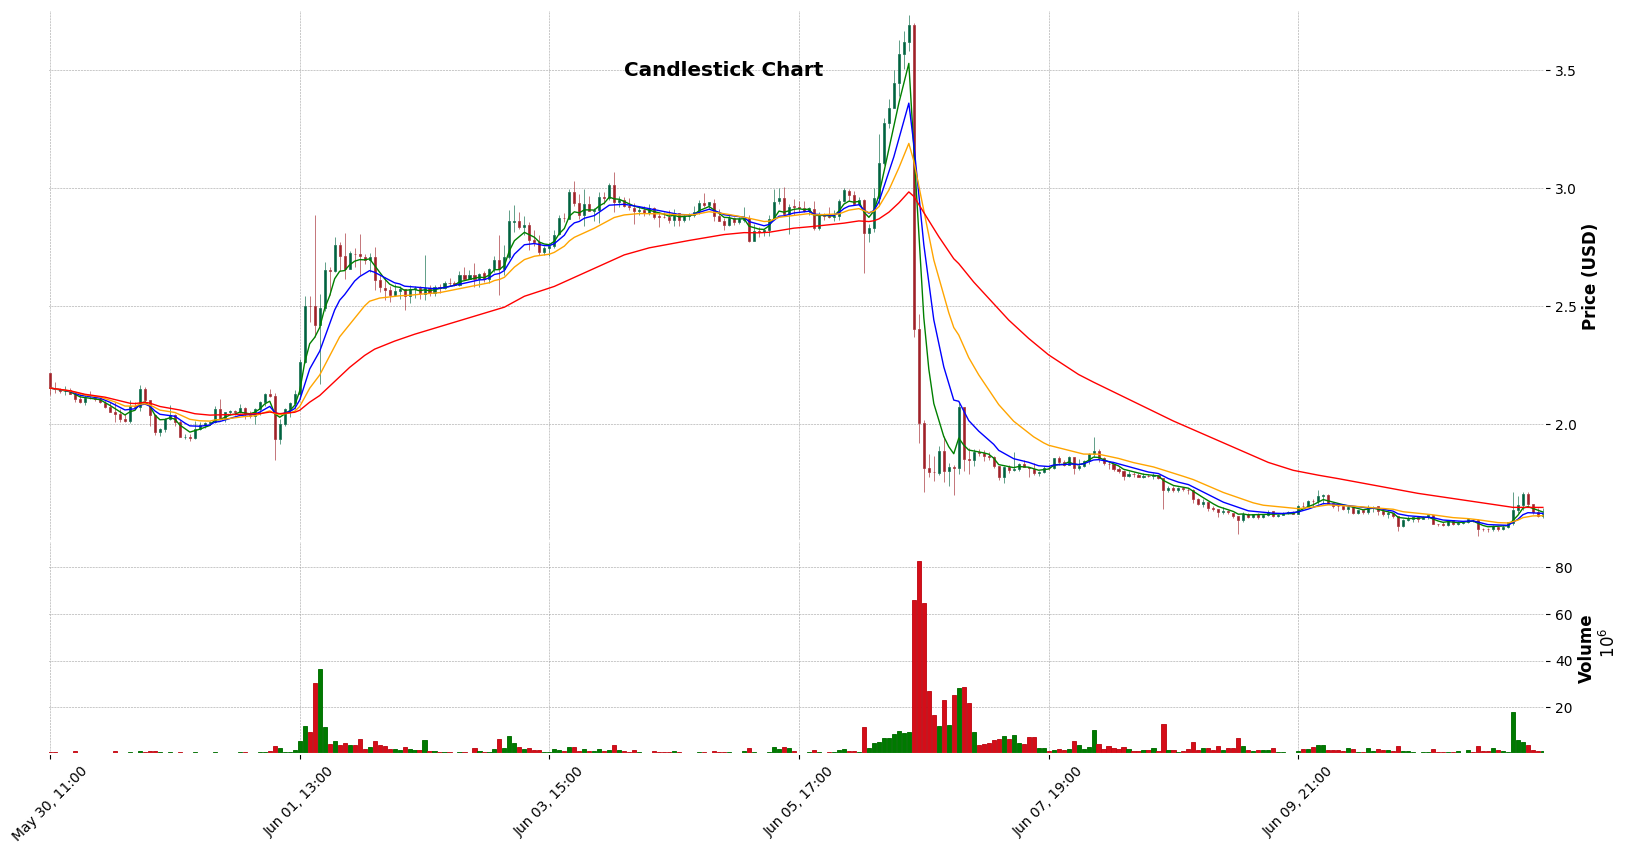

In [9]:
plot_kline_chart(df)

In [12]:
bs = BuySignal()
ss = SellSignal()

df_signal = bs.detect_dizijue_entry(df)
df_signal = ss.detect_exit_signal_full(df_signal)

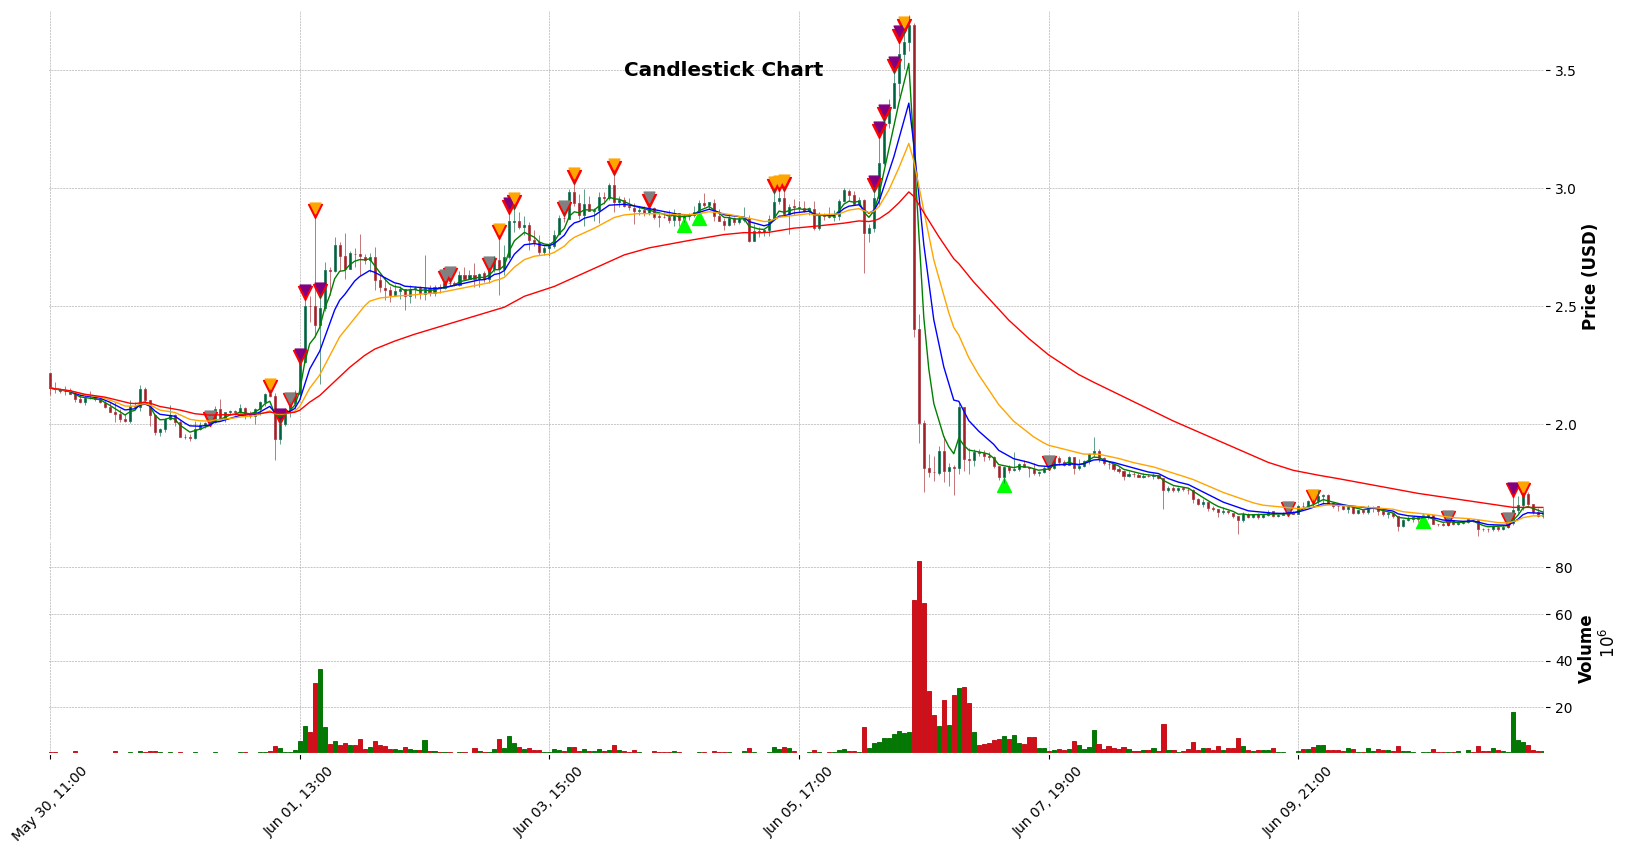

In [13]:
plot_kline_chart(df_signal)